In [12]:
!pip install -U diffusers==0.27.2
import diffusers
import torch

In [13]:
!pip show diffusers

Name: diffusers
Version: 0.27.2
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/diffusers/graphs/contributors)
Author-email: patrick@huggingface.co
License: Apache 2.0 License
Location: /home/workingtoaster/anaconda3/envs/cl/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [3]:
# Download weights
!wget https://huggingface.co/lllyasviel/sd_control_collection/resolve/main/kohya_controllllite_xl_canny.safetensors

--2024-03-20 19:54:49--  https://huggingface.co/lllyasviel/sd_control_collection/resolve/main/kohya_controllllite_xl_canny.safetensors
Resolving huggingface.co (huggingface.co)... 108.138.51.26, 108.138.51.21, 108.138.51.8, ...
Connecting to huggingface.co (huggingface.co)|108.138.51.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/81/40/814074e4bf63cffbabe9980993334f8d53d66ee7207b7d9a482c916296779bd7/dbe4f0f4299255f517449e44a9170b234f636b7850350feaf0590e0827bb6c5f?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27kohya_controllllite_xl_canny.safetensors%3B+filename%3D%22kohya_controllllite_xl_canny.safetensors%22%3B&Expires=1711216490&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMTIxNjQ5MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy84MS80MC84MTQwNzRlNGJmNjNjZmZiYWJlOTk4MDk5MzMzNGY4ZDUzZDY2ZWU3MjA3YjdkOWE0ODJjOTE2Mjk2Nzc5YmQ3L2RiZTR

In [3]:
from diffusers import StableDiffusionXLPipeline

pipeline = diffusers.StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16, 
    variant="fp16"
).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 17.83it/s]


In [4]:
from controlnet_lite import ControlNetLLLite

# Load ControlNetLllite weights 
path = 'kohya_controllllite_xl_canny.safetensors'
controlnet = ControlNetLLLite(path)

In [5]:
from PIL import Image
import numpy as np

# Load Control Image
image = diffusers.utils.load_image("https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png")
# Convert the image to numpy array
control_image = np.array(image)

In [10]:
conditioning_weight = 0.9
# Currently there is no way to control start and end of the conditioning
# As it can only be controled from the diffusers.DiffusionPipeline, and will require
# separate custom pipeline for Txt2Img, Img2Img etc.
# TODO: figure out smart way to bypass this

# Apply ControlNetLLLite to the pipeline
controlnet.apply(pipe=pipeline, cond=control_image, weight=conditioning_weight)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:02<00:00,  6.84it/s]


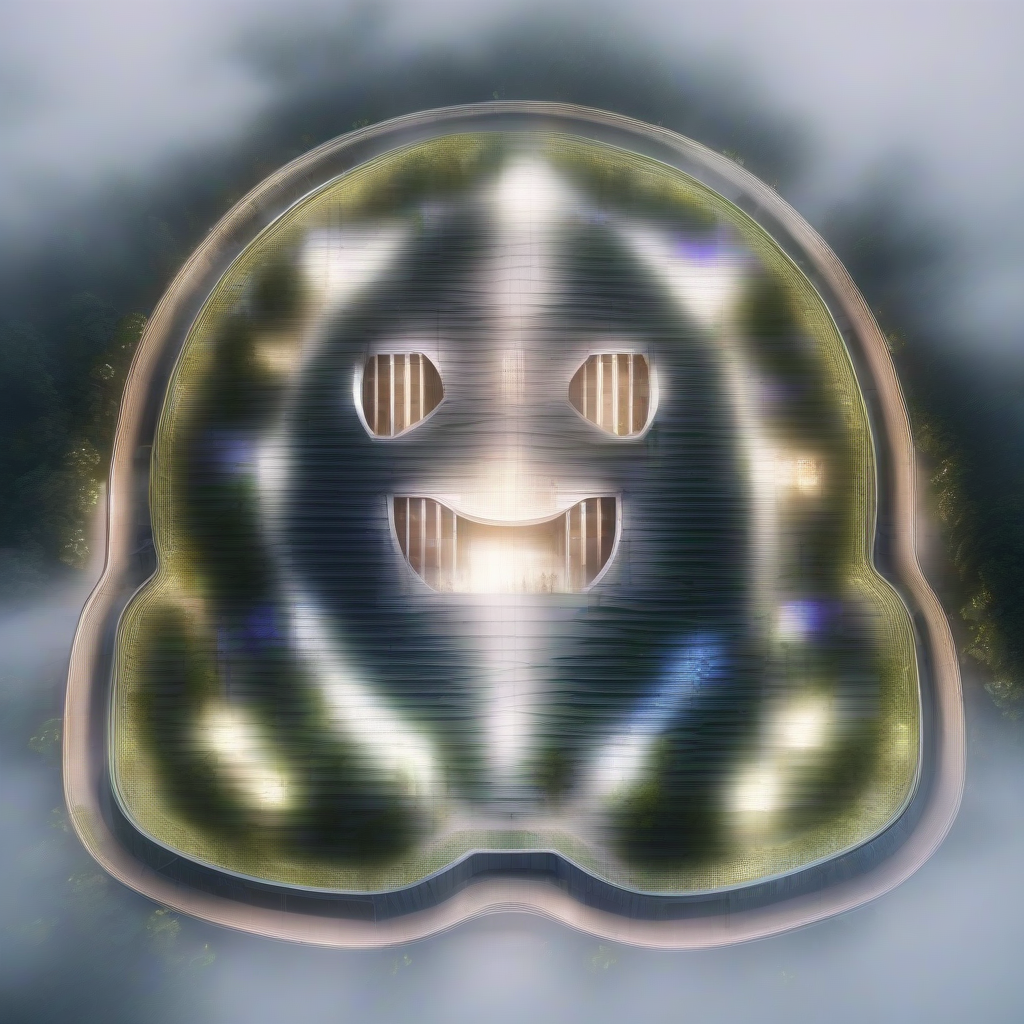

In [11]:
with torch.inference_mode():
        image = pipeline(prompt="aerial view, a futuristic research complex in a bright foggy jungle, hard lighting", num_inference_steps=20).images[0]
image

In [8]:
# To unload all controlnetLite modules from the pipeline
from controlnet_lite import clear_all_lllite
clear_all_lllite()

100%|██████████| 20/20 [00:02<00:00,  7.40it/s]


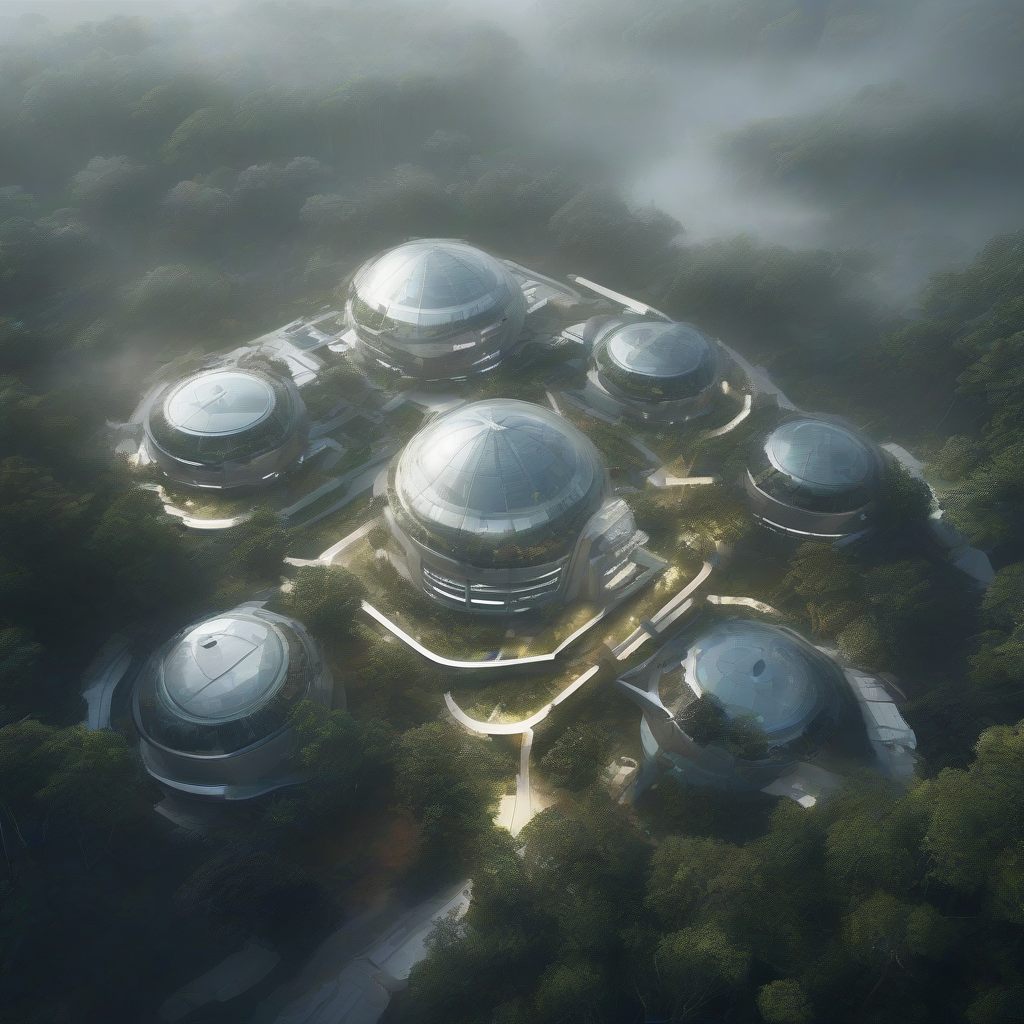

In [9]:
with torch.inference_mode():
        image = pipeline(prompt="aerial view, a futuristic research complex in a bright foggy jungle, hard lighting", num_inference_steps=20).images[0]
image